In [32]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout


In [33]:
df = pd.read_csv("IMDB Dataset.csv")

In [34]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [35]:
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

In [36]:
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)


In [37]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

In [38]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)


In [39]:
max_len = 200
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

Build LSTM Model (Embedding = 32)

In [40]:
model_32 = Sequential([
    Embedding(input_dim=10000, output_dim=32, input_length=max_len),
    LSTM(64),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_32.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_32.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Train Model (Embedding = 32)

In [41]:
history_32 = model_32.fit(X_train_pad, y_train, epochs=5, batch_size=128, validation_split=0.2)


Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 79s 307ms/step - accuracy: 0.6916 - loss: 0.5544 - val_accuracy: 0.8798 - val_loss: 0.2926
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 77s 310ms/step - accuracy: 0.9103 - loss: 0.2393 - val_accuracy: 0.8829 - val_loss: 0.2848
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 76s 306ms/step - accuracy: 0.9289 - loss: 0.1941 - val_accuracy: 0.8804 - val_loss: 0.3218
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 75s 302ms/step - accuracy: 0.9441 - loss: 0.1591 - val_accuracy: 0.8791 - val_loss: 0.3186
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 74s 297ms/step - accuracy: 0.9526 - loss: 0.1318 - val_accuracy: 0.8785 - val_loss: 0.3648


Build Model (Embedding = 64)

In [42]:
model_64 = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=max_len),
    LSTM(64),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_64.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_64 = model_64.fit(X_train_pad, y_train, epochs=5, batch_size=128, validation_split=0.2)


Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 88s 341ms/step - accuracy: 0.6928 - loss: 0.5589 - val_accuracy: 0.8737 - val_loss: 0.3045
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 143s 347ms/step - accuracy: 0.9032 - loss: 0.2565 - val_accuracy: 0.8759 - val_loss: 0.2936
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 86s 343ms/step - accuracy: 0.9311 - loss: 0.1948 - val_accuracy: 0.8804 - val_loss: 0.3029
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 142s 344ms/step - accuracy: 0.9465 - loss: 0.1486 - val_accuracy: 0.8691 - val_loss: 0.4067
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 85s 340ms/step - accuracy: 0.9540 - loss: 0.1260 - val_accuracy: 0.8708 - val_loss: 0.3862


Compare Results

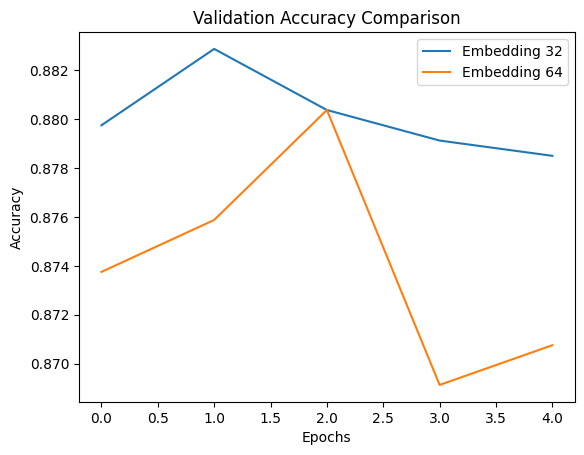

In [43]:
import matplotlib.pyplot as plt

plt.plot(history_32.history['val_accuracy'], label='Embedding 32')
plt.plot(history_64.history['val_accuracy'], label='Embedding 64')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Evaluate on Test Set

In [44]:
acc_32 = model_32.evaluate(X_test_pad, y_test, verbose=0)[1]
acc_64 = model_64.evaluate(X_test_pad, y_test, verbose=0)[1]

print(f"Test Accuracy (Embedding 32): {acc_32:.4f}")
print(f"Test Accuracy (Embedding 64): {acc_64:.4f}")


Test Accuracy (Embedding 32): 0.8809
Test Accuracy (Embedding 64): 0.8751
